<a href="https://colab.research.google.com/github/RohithRagavender/practice/blob/main/Decision_Tree_Practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my Code I manually type this one and Below code is given by the chatgpt to improvise the my code for interview Aspect only


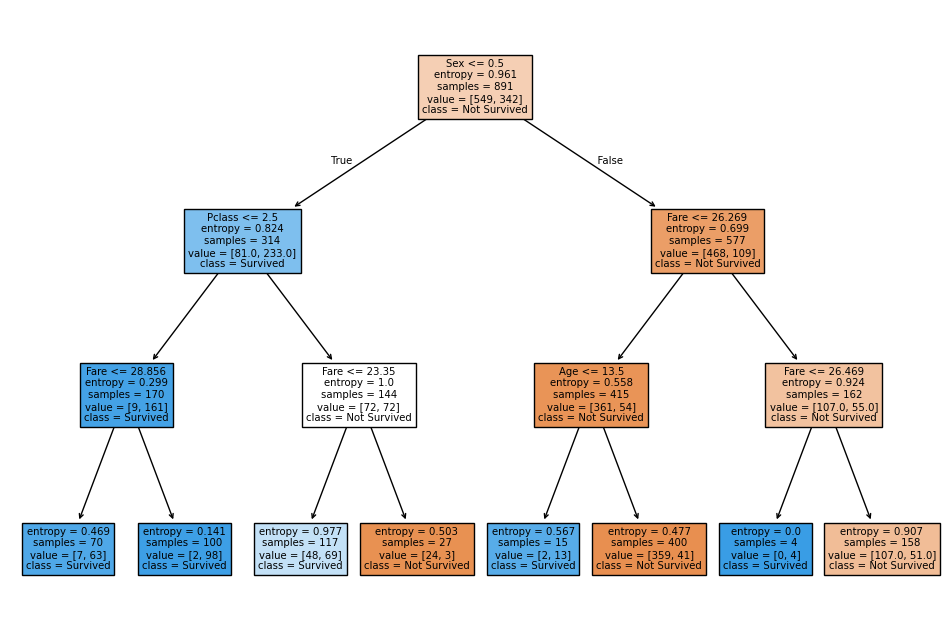

In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


df = pd.read_csv('titanic.csv')



input = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
target= df['Survived']

#Data preprocessing
input['Age']=input['Age'].fillna(df['Age'].mean())



#LableEncoder
le=LabelEncoder()
le_sex= le.fit_transform(input['Sex'])
input['Sex']=le_sex

#Model Training
model= DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3)
model.fit(input,target)
model.feature_importances_


model.score(input,target)
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=input.columns, class_names=["Not Survived","Survived"], filled=True)
plt.show()


This is Chatgpt Code

/tmp/ipython-input-889809203.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input["Age"] = input["Age"].fillna(df["Age"].mean())
/tmp/ipython-input-889809203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input["Sex"] = le.fit_transform(input["Sex"])


Training Accuracy: 0.8356741573033708
Testing Accuracy : 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Cross-validation Accuracy Scores: [0.72625698 0.75280899 0.82022472 0.78651685 0.85393258]
Mean CV Accuracy: 0.7879480258615279

Feature Importance:
       Feature  Importance
1         Sex    0.518213
0      Pclass    0.229466
2         Age    0.111678
3        Fare    0.087114
4  FamilySize    0.053528
5     IsAlone    0.000000


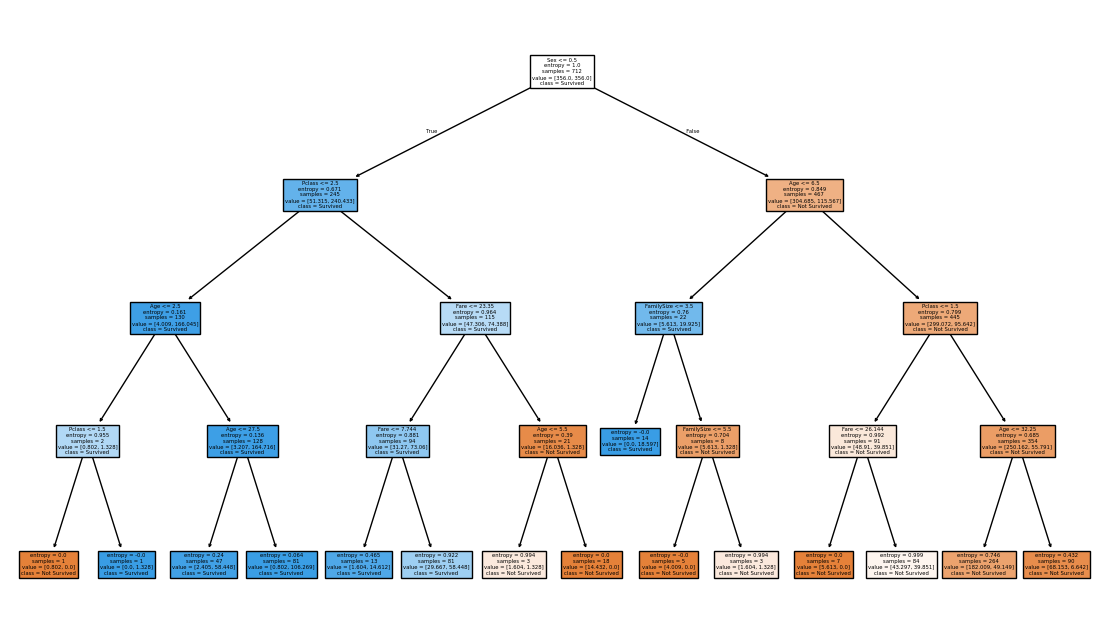

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("titanic.csv")

# Feature Engineering
df["FamilySize"] = df["SibSp"] + df["Parch"]
df["IsAlone"] = (df["FamilySize"] == 0).astype(int)

# Input & Target
input = df[["Pclass", "Sex", "Age", "Fare", "FamilySize", "IsAlone"]]
target = df["Survived"]

# Handle Missing Age
input["Age"] = input["Age"].fillna(df["Age"].mean())

# Label Encoding for Sex
le = LabelEncoder()
input["Sex"] = le.fit_transform(input["Sex"])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

# Model with class_weight balanced
model = DecisionTreeClassifier(criterion="entropy",
                               random_state=42,
                               max_depth=4,
                               class_weight="balanced")
model.fit(X_train, y_train)

# Accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)

# Predictions
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation (to check stability)
cv_scores = cross_val_score(model, input, target, cv=5)
print("\nCross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Feature Importance
fi = pd.DataFrame({"Feature": input.columns, "Importance": model.feature_importances_})
print("\nFeature Importance:\n", fi.sort_values(by="Importance", ascending=False))

# Plot Tree
plt.figure(figsize=(14,8))
plot_tree(model, feature_names=input.columns, class_names=["Not Survived","Survived"], filled=True)
plt.show()
